In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 

# 05. 概率论入门
概率论是预测的基础。我们用概率表示事件发生的可能性。通过概率论，我们能够对现实世界中某些随机性或偶发性事件进行建模。

## 5.1 基本的定义
概率论最基础的概念之一是`过程`(procedure)。`过程`指产生某个结果的行动，比如，掷骰子和访问网站。

`事件`(event)是某个`过程`产生的一系列结果的合集。比如，掷硬币得到正面朝上的结果或在网站停留4秒后离开。

`简单事件`(simple event)指由某个过程产生的不可再分的事件。比如，掷两次骰子可以被拆分为以下两简单事件：掷第1次骰子，掷第2次骰子。

`样本空间`(sample space)指某个过程产生的所有可能的简单事件的集合。比如，连续掷3次硬币，样本空间大小是8即$\{正正正，正正反，正反反，正反正，反反反，反反正，反正正，反 正反\}$。

## 5.2 概览
事件的`概率`(probability)指事件出现的频率或可能性，$A$表示事件，$P(A)$表示事件发生的概率。

我们定义事件$A$的概率为：
+ $P(A) = \frac{事件A出现的次数}{样本空间的大小}$
其中，$A$表示待求解的事件。

## 5.3 贝叶斯 vs. 频率论
在真实案例中，我们有时很难计算事件发生的次数。比如，随机抽取某个人，我们想知道他/她每天至少抽1次烟的概率。如果用传统的方式(概率公式)求解，我们需要知道烟民总数和每天至少抽1次烟的烟民数量分别是多少—这是不可能得到的数字！


面对这样的困境， 在计算事件概率时出现了两个不同的方法：`频率论方法`(Frequentist approac)和`贝叶斯论方法`(Bayesian approach)。

本章将重点研究频率论方法，下一章将重点研究贝叶斯方法。

### 5.3.1 频率论方法
在频率论方法中，事件的概率是通过实验获得的。它利用过去的数据预测未来某个事件的概率。

频率论方法的公式如下：
+ $P(A) = \frac{事件A出现的次数}{过程被重复的次数}$

简而言之，我们观察事件的多个实例，计算事件$A$出现的次数，两者相除即为概率的近似值。

> 这和贝叶斯方法存在很大区别。贝叶斯方法更偏向通过理论方式计算事件的概率。 我们需要更深入地思考事件本身和事件发生的原因。这两种方式计算的概率都不一定百分之百准确，选择何种方法取决于待解决的问题和计算难度。

频率论方法的核心是`相对频率`(relative frequency)。相对频率等于事件出现的次数除以总观测次数。

##### 示例：营销统计
假设我们想知道网站用户中有多少人会再次访问，该指标被称为`重复访客率`(the rate of repeat visitors)。我们定义事件$A$为用户再次访问网站。我们利用网站访问日志计算事件$A$的相对频率。假设过去1周，1458个独立访问者(unique visitors)中有452个人属于重复访问者(repeat visitors)，则：
+ $P( A) = \frac{452}{1458} = 0.31$

##### 大数法则
`大数法则`(the law of large numbers)是频率论方法能够成立的原因。大数法则指如果我们不断重复某个过程，那么相对频率将接近真实概率。

如果我问你`1～10`的平均值是多少，你会脱口而出5。下面我们利用Python计算`1～10`的平均值，演示什么是大数法则。我们随机从`1~10`中取1个、2个、3个、10000个随机数，计算平均值：

In [2]:
results = [] 

for n in range(1,10000):
    nums = np.random.randint(low=1,high=10, size=n)
    # choose n numbers between 1 and 10
    mean = nums.mean() # find the average of these numbers
    results.append(mean) # add the average to a running list

len(results)

9999

In [3]:
df = pd.DataFrame({ 'means' : results})
df.head(5)

,means
0,5.00
1,4.50
2,4.00
3,4.75
4,4.40


In [4]:
# as n, our size of the sample size, increases, the averages get closer to 5
df.tail()

,means
9994,4.993197
9995,4.982893
9996,4.972892
9997,4.985097
9998,4.971197


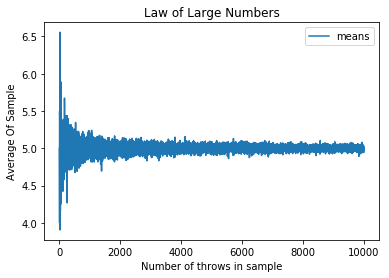

In [5]:
df.plot(title='Law of Large Numbers') 
plt.xlabel("Number of throws in sample")
plt.ylabel("Average Of Sample") 
plt.show()

随着我们不断增加样本大小，相对频率逐渐接近真实平均值5。

在统计学章节，我们将给出更加严格的定义，现在你只需要知道大数法则可以让相对频率接近事件的真实概率。

## 5.4 复合事件
有时，我们需要同时处理两个或多个事件，这叫作`复合事件`(compound events)。`复合事件`指包含两个及以上简单事件的事件。 

给定事件$A$和事件$B$：
+ 事件$A$和事件$B$同时发生的概率用$P(A \cap B) = P(A 且 B)$表示
+ 事件$A$或事件$B$发生的概率用$P(A \cup B) = P(A 或 B)$表示

深入理解为什么用`集合`(set)符号表示复合事件非常重要。我们用大圆`Universe`表示全体事件。假设新开展一项关于癌症检测的实验，参与者有100人。如`图5.3`所示，灰色区域$A$表示25名癌症患者。根据相对频率方法，我们可以认为$P(A)=\frac{癌症患者数}{实验总参与人数}$，即$\frac{25}{100}=0.25$。

事件`B`指癌症检测结果呈阳性(可能患有癌症)。假设事件`B`共有30人，则$P(B)=\frac{30}{100}=0.3$。即从100人中随机选1人，癌症检测结果为阳性的概率为$30%$，如`图5.4`所示。
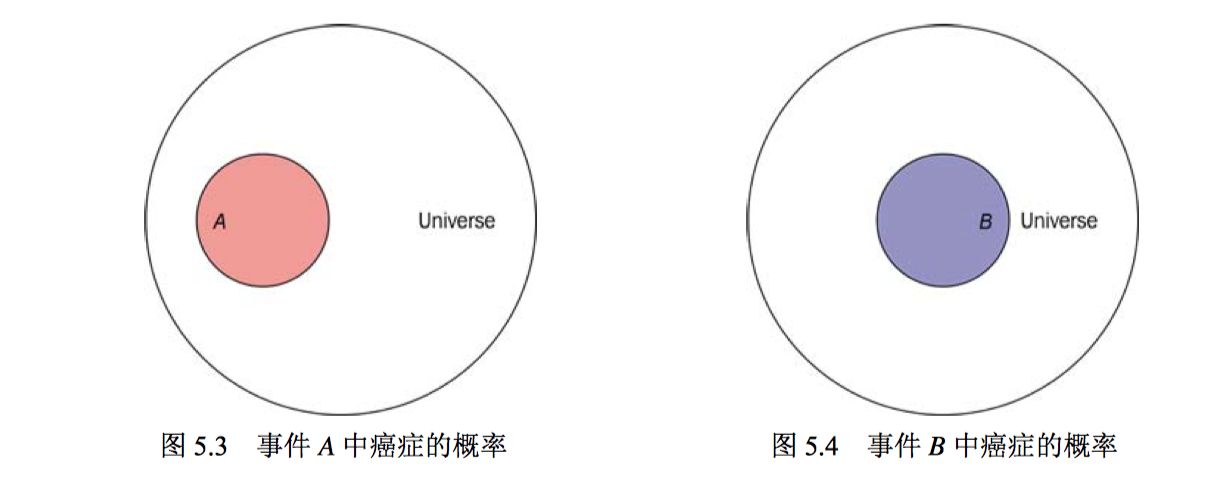

事件$A$和事件$B$是独立的事件，但两者也拥有交集，即有些人既参与了事件$A$，也参与了事件$B$，如`图5.5`所示。

在事件$A$和$B$中都出现的参与者，被称为$A交B$或$A \cap B$，表示癌症检测为阳性且患有癌症，如`图5.6`所示。
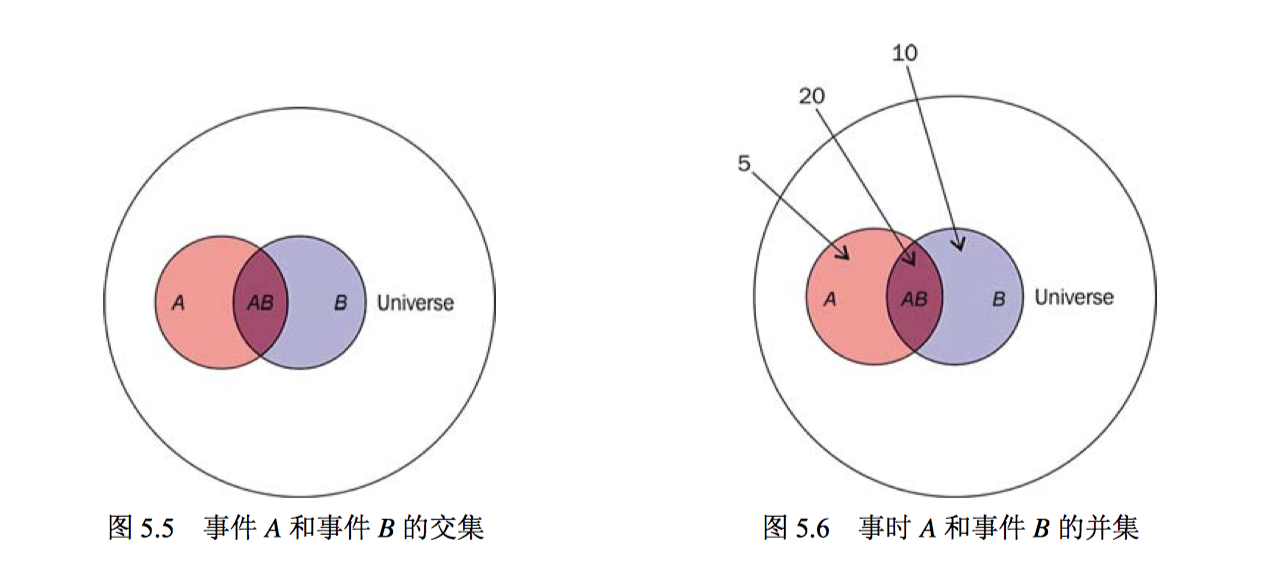

简单总结，在`图5.6`中，实验的所有参与者有以下4种分类：
+ 粉色：表示患有癌症且检测结果为阴性
+ 紫色($A \cap B$)：表示患有癌症且检测结果为阳性
+ 蓝色：表示未患有癌症但检测结果为阳性
+ 白色：表示未患有癌症且检测结果为阴性

所以，真正正确的检测结果是白色和紫色区域，位于粉色和蓝色区域的实验结果是错误的。

## 5.5 条件概率
从100名实验对象中随机挑选1名参与者。假设已知该参与者的检测结果为阳性，请问参与者真实患有癌症的概率是多少？这种情况叫作给定条件$B$，求$A$的`条件概率`，记为$P(A|B)$。

`条件概率`是求解在某一事件已经发生的情况下，另一事件发生的概率。

你也可以将条件概率理解为改变了总体的大小。$P(A|B)$的总体由`图5.6`中的`Universe`变为`B`，如`图5.7`所示。
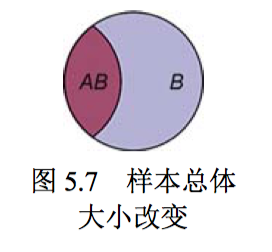

条件概率计算公式如下：
+ $P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{\frac{20}{100}}{\frac{30}{100}} = \frac{20}{30} = 66%$

如果检测结果为阳性，则患有癌症的概率为$66%$。在现实中，类似的条件概率是实验设计者最希望得到的结果，因为他们希望知道的是检测方法在预测癌症方面的真实效果。

## 5.6 概率定理
在概率论中，有一些难以可视化表达但非常有用的定理，可以帮助我们轻松地计算复合概率。

### 5.6.1 加法定理
加法定理用于计算`或`事件的概率：
+ $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

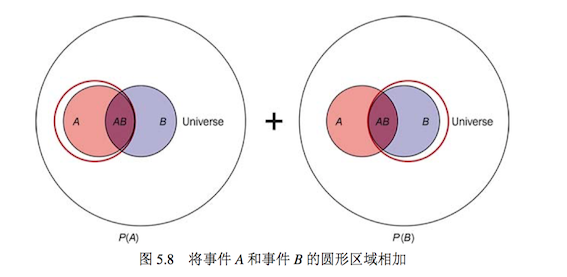

图中红色圆形区域都包含$A$和$B$的交集，当我们将两个事件$A$和$B$相加时，需要减去其中一个交集。

### 5.6.2 互斥性
当两个事件不能同时发生时，我们称它们为`互斥事件`(mutually exclusive)。这意味着两个事件的交集为空集，即$A \cap B=\emptyset$，或$P(A \cap B) = P(A 且 B) = 0$。

如果两个事件是互斥的，那么：
+ $P(A \cup B)=P(A 或 B)=P(A)+P(B)−P(A \cap B)=P(A)+P(B)$

### 5.6.3 乘法定理
乘法定理用于计算`且`事件的概率，即：
+ $P(A \cap B) = P(A 且 B) = P(A)\cdot P(B|A)$

分析一个案例。假设随机选取10人，有6人使用iPhone，4人使用Android。请问随机选取两个人都使用iPhone的概率是多少？也就是说，对于以下两个事件：
+ 事件$A$：第1个人用iPhone
+ 事件$B$：第2个人用iPhone

求$P(A \cap B)$，即$P(iPhone用户 \cap iPhone用户)$是多少。

根据公式$P(A \cup B) = P(A) + P(B) - P(A \cap B)$，$P(A)$很容易计算，10个人中有6个是 iPhone 用户，所以事件$A$发生的概率是$\frac{6}{10}=0.6$。如果选取1个iPhone用户的概率是$0.6$，那么选取2个iPhone用户的概率应该是$0.6×0.6$，对吧？ 等等！在选取第2个iPhone用户时，只剩下了9 人。所以在转换后的样本空间中，我们有9个人，其中5个是iPhone用户，4个是Android用户，因此$P(B)=\frac{5}{9}=0.555$。因此，选取两个人都使用iPhone的概率是$0.6\times 0.555=0.333=33%$，即从10个人中随机选取两个人使用iPhone的概率是$\frac{1}{3}$。

### 5.6.4 独立性
如果两个事件互不影响对方的发生，那么这两个事件是相互独立的，因此： 
+ $P(B|A) = P(B)，P(A|B) = P(A)$ 

如果两个事件是独立事件，那么： 
+ $P(A\cap B) = P(A) \cdot P(B|A) = P(A)\cdot P(B)$

以下是常见的独立事件：
+ 旧金山在下雨，同时一个婴儿在印度出生
+ 抛第1枚硬币得到正面，抛第2枚硬币得到反面

以上案例中的事件属于独立事件，它们互不影响对方的发生概率。

### 5.6.5 互补事件
事件$A$的`互补事件`(complementary events)指事件$A$的相反事件或否定事件，通常用$\overline{A}$表示。

互补事件的概率计算公式：
+ $P(\overline{A})=1−P(A)$

例如，某创业团队马上要和3个不同的投资者开会，我们已知以下概率：
+ 第1场会议获得投资的概率是60%
+ 第2场会议获得投资的概率是15%
+ 第3场会议获得投资的概率是45%

请问，这个团队至少获得1笔投资的概率是多少？

我们用$A$表示至少获得1笔投资，$\overline{A}$表示没有获得任何投资，则$P(A)$可以用下式表示：
+ $P(A)=1−P(\overline{A})$

由于：
+ $P(\overline{A}) = P(没有拿到第1个投资者的投资 \cap 没有拿到第2个投资者的投资 \cap 没有拿到第3个投资者的投资)$

我们假设这些事件是独立事件(投资者间没有互相交流)，那么：
+ $P(\overline{A})=P(没有拿到第1个投资者的投资) \times P(没有拿到第2个投资者的投资) \times P(没有拿到第3个投资者的投资) = 0.4\times 0.85\times 0.55=0.187$

最终结果：
+ $P(A)=1−0.187=0.813=81\%$

## 5.7 再进一步
下面这个测试叫作`二元分类器`(binary classifer)，它来自机器学习。二元分类器只能预测两种结果：癌症和非癌症。当我们使用二元分类器时，可以计算出模型的`混淆矩阵`(confusion matrix)，即一个$2\times 2$矩阵，每个单元格表示实验可能出现的结果之一。

假设有165人参与了实验，我们已经通过其他途径知道他们是否真正患有癌症。以下是实验结果的混淆矩阵：
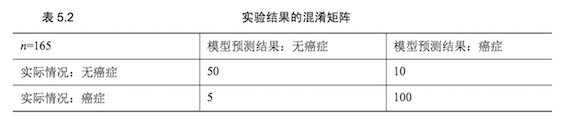

我们得到了以下4个不同的分类：
+ `真阳性`(true positives)：指分类器正确预测了癌症(阳性)，共100人
+ `真阴性`(true negatives)：指分类器正确预测了非癌症(阴性)，共50人
+ `假阳性`(false positives)：指分类器错误地预测了癌症(阳性)，共10人
+ `假阴性`(false negatives)：指分类器错误地预测了非癌症(阴性)，共5人

假阳性被称为**I型错误**(**type I error**)， 假阴性被称为**II型错误**(**type II error**)，如`图5.9`：
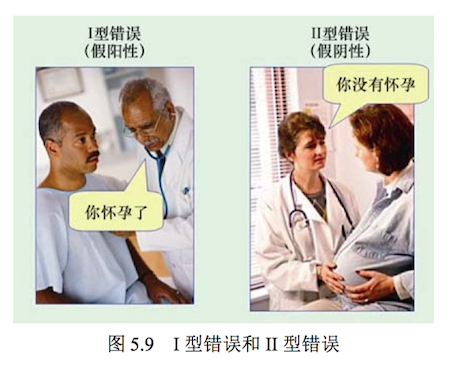

我们将在后面的章节继续讨论这件事。